In [66]:
import xlearn as xl
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score

In [67]:
df = pd.read_csv("data.csv")
df

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
0,2021-09-27 00:01:30.000000,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1
1,2021-09-26 22:54:49.000000,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1
2,2021-09-26 23:57:20.000000,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1
3,2021-09-27 00:04:30.000000,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1
4,2021-09-27 00:06:21.000000,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15821467,2021-10-02 15:51:35.000000,146,530,4329496688011613719,0,2,9,530,0.020,0.040037,-3.495224,481,0.020,0.039634,-3.493091,1,0
15821468,2021-09-27 22:03:14.000000,12,22,453968700792456599,0,1,6,11464229,0.010,0.000000,0.000000,22,0.004,0.008525,-5.630203,1,0
15821469,2021-10-02 17:41:10.000000,12,1236,9112780675655118328,0,2,0,1236,0.046,0.021433,-5.986478,1234,0.046,0.021363,-5.986109,1,0
15821470,2021-09-29 00:39:32.000000,967,21,6968514095695555037,0,0,0,21,0.014,0.083901,-3.025758,2,0.014,0.083865,-3.063858,1,0


Удалим ненужные фичи, разделим на train/val/test

In [68]:
drop_names = ['banner_id0', 'banner_id1', 'rate0', 'rate1', 'g0', 'g1', 'coeff_sum0', 'coeff_sum1' ]
for name in drop_names:
    df.pop(name)
df.pop('impressions')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.drop(1390198)
df

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks
0,2021-09-27 00:01:30,0,0,5664530014561852622,0,0,0,1
1,2021-09-26 22:54:49,1,1,5186611064559013950,0,0,1,1
2,2021-09-26 23:57:20,2,2,2215519569292448030,3,0,0,1
3,2021-09-27 00:04:30,3,3,6262169206735077204,0,1,1,1
4,2021-09-27 00:06:21,4,4,4778985830203613115,0,1,0,1
...,...,...,...,...,...,...,...,...
15821467,2021-10-02 15:51:35,146,530,4329496688011613719,0,2,9,0
15821468,2021-09-27 22:03:14,12,22,453968700792456599,0,1,6,0
15821469,2021-10-02 17:41:10,12,1236,9112780675655118328,0,2,0,0
15821470,2021-09-29 00:39:32,967,21,6968514095695555037,0,0,0,0


In [69]:
df = df.sort_values("date_time")

In [70]:
max_date = df["date_time"].iloc[-1].date()
max_date

datetime.date(2021, 10, 2)

In [71]:
#df_test = df[(df['date_time'].dt.date == max_date)]
df = df[(df['date_time'].dt.date < max_date)]


In [72]:
df = df.sort_values("date_time")

In [73]:
max_date = df["date_time"].iloc[-1].date()

In [74]:
max_date

datetime.date(2021, 10, 1)

In [75]:
df_val = df[(df['date_time'].dt.date == max_date)]
df = df[(df['date_time'].dt.date < max_date)]


In [76]:
df

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks
8423230,2021-09-26 00:00:00,1412,156,784103469229141782,0,1,12,0
14840335,2021-09-26 00:00:00,87,99,5299288921807778081,0,1,1,0
12701328,2021-09-26 00:00:00,243,21,7843381368818250552,0,0,0,0
13054066,2021-09-26 00:00:00,0,7,2939587009140698008,0,4,1,0
10652366,2021-09-26 00:00:00,2,196,3723632517254901476,0,0,0,0
...,...,...,...,...,...,...,...,...
11159519,2021-09-30 23:59:59,168,161,8481381842118306791,0,0,1,0
3842833,2021-09-30 23:59:59,77,231,6255040383984554244,0,3,0,0
6198955,2021-09-30 23:59:59,15,202,8452423829699085197,0,0,15,0
12346,2021-09-30 23:59:59,68,21,9048424169260785187,0,0,0,1


In [77]:
df_val

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks
7465011,2021-10-01 00:00:00,14,0,7558598582596132463,0,0,0,0
52924,2021-10-01 00:00:00,14,83,8455259240578789950,0,2,3,1
4676591,2021-10-01 00:00:00,14,384,5274157095111279519,0,1,3,0
6811089,2021-10-01 00:00:00,168,49,5703620665238317782,0,0,0,0
11268423,2021-10-01 00:00:00,1,579,326442446341096655,0,0,8,0
...,...,...,...,...,...,...,...,...
6809215,2021-10-01 23:59:59,275,102,2807164680012628209,0,4,1,0
9789489,2021-10-01 23:59:59,12,173,1227595874551336133,0,2,7,0
14917859,2021-10-01 23:59:59,17,76,8694953474274391876,0,1,3,0
10913431,2021-10-01 23:59:59,17,52,5271583595053277222,1,2,5,0


In [78]:
df_test

,date_time,zone_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id1,clicks
9767447,2021-10-02 00:00:00,0,3615498569651227068,0,1,3,34,0
13846765,2021-10-02 00:00:00,14,3504898510001081112,0,1,0,14230835,0
3091651,2021-10-02 00:00:00,76,4016064483098779580,0,4,1,237,0
10045990,2021-10-02 00:00:00,17,2660767342182365745,0,2,0,1239,0
9054327,2021-10-02 00:00:00,24,684235863208116380,0,1,10,719,0
...,...,...,...,...,...,...,...,...
1745969,2021-10-02 23:59:59,0,1602730444213689664,0,6,0,11815404,0
13959634,2021-10-02 23:59:59,76,7727064149323604529,2,3,0,153,0
13319080,2021-10-02 23:59:59,20,6641189974907647716,0,6,0,1235,0
3336944,2021-10-02 23:59:59,24,5831343304744661795,0,0,12,385,0


Создадим interactions и удолим ненужные для обучения данные

(0.0, 100.0)

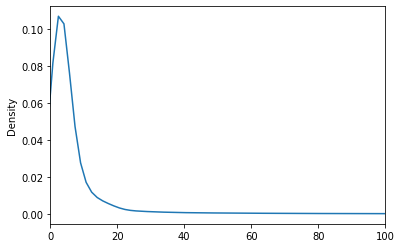

In [79]:
df['campaign_clicks'][df['campaign_clicks'] > 1].plot(kind='kde')
plt.xlim(0, 100)

In [80]:
def data_preparation(df):
    df.loc[df.campaign_clicks > 10, "campaign_clicks"] = 10

    df["hour"] = df["date_time"].dt.hour
    
    df["local_time"] = (df["country_id"].astype("str") + '_' + df["hour"].astype("str"))
    df["os_zone"] = (df["os_id"].astype("str") + '_' + df["zone_id"].astype("str"))
    df["country_banner"] = (df["country_id"].astype("str") + '_' + df["banner_id"].astype("str"))
    
    for col in ["date_time", "hour"]:
        df.pop(col)
        
    df = df.astype("category")

    return df



In [81]:
data_preparation(df)

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,12_0,1_1412,12_156
14840335,87,99,5299288921807778081,0,1,1,0,1_0,1_87,1_99
12701328,243,21,7843381368818250552,0,0,0,0,0_0,0_243,0_21
13054066,0,7,2939587009140698008,0,4,1,0,1_0,4_0,1_7
10652366,2,196,3723632517254901476,0,0,0,0,0_0,0_2,0_196
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,1_23,0_168,1_161
3842833,77,231,6255040383984554244,0,3,0,0,0_23,3_77,0_231
6198955,15,202,8452423829699085197,0,0,15,0,15_23,0_15,15_202
12346,68,21,9048424169260785187,0,0,0,1,0_23,0_68,0_21


In [82]:
df

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,12_0,1_1412,12_156
14840335,87,99,5299288921807778081,0,1,1,0,1_0,1_87,1_99
12701328,243,21,7843381368818250552,0,0,0,0,0_0,0_243,0_21
13054066,0,7,2939587009140698008,0,4,1,0,1_0,4_0,1_7
10652366,2,196,3723632517254901476,0,0,0,0,0_0,0_2,0_196
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,1_23,0_168,1_161
3842833,77,231,6255040383984554244,0,3,0,0,0_23,3_77,0_231
6198955,15,202,8452423829699085197,0,0,15,0,15_23,0_15,15_202
12346,68,21,9048424169260785187,0,0,0,1,0_23,0_68,0_21


In [83]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(df[["local_time", "os_zone", "country_banner"]])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [84]:
def transform_interactions(enc, df):
    df[["local_time", "os_zone", "country_banner"]] = enc.transform(df[["local_time", "os_zone", "country_banner"]])
    df[["local_time", "os_zone", "country_banner"]] = df[["local_time", "os_zone", "country_banner"]].astype("int").astype("category")
    return df

In [85]:
df = transform_interactions(enc, df)
df

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,72,2450,1796
14840335,87,99,5299288921807778081,0,1,1,0,192,3861,4313
12701328,243,21,7843381368818250552,0,0,0,0,0,1060,473
13054066,0,7,2939587009140698008,0,4,1,0,192,6578,4167
10652366,2,196,3723632517254901476,0,0,0,0,0,797,462
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,208,558,3888
3842833,77,231,6255040383984554244,0,3,0,0,16,6495,487
6198955,15,202,8452423829699085197,0,0,15,0,160,412,3032
12346,68,21,9048424169260785187,0,0,0,1,16,1840,473


In [88]:
df_test = df_test.rename(columns={"banner_id1": "banner_id"})
df_test = data_preparation(df_test)

In [31]:
df_val = data_preparation(df_val)

In [32]:
df_test = transform_interactions(enc, df_test)

In [33]:
df_val = transform_interactions(enc, df_val)

In [34]:
df

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,72,2450,1796
14840335,87,99,5299288921807778081,0,1,1,0,192,3861,4313
12701328,243,21,7843381368818250552,0,0,0,0,0,1060,473
13054066,0,7,2939587009140698008,0,4,1,0,192,6578,4167
10652366,2,196,3723632517254901476,0,0,0,0,0,797,462
...,...,...,...,...,...,...,...,...,...,...
11159519,168,161,8481381842118306791,0,0,1,0,208,558,3888
3842833,77,231,6255040383984554244,0,3,0,0,16,6495,487
6198955,15,202,8452423829699085197,0,0,15,0,160,412,3032
12346,68,21,9048424169260785187,0,0,0,1,16,1840,473


In [35]:
df_test

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
9767447,0,76,3615498569651227068,0,1,3,0,240,2125,-1
13846765,14,40,3504898510001081112,0,1,0,0,0,2435,580
3091651,76,7,4016064483098779580,0,4,1,0,192,8159,4167
10045990,17,132,2660767342182365745,0,2,0,0,0,4502,231
9054327,24,428,684235863208116380,0,1,10,0,24,3038,1105
...,...,...,...,...,...,...,...,...,...,...
1745969,0,1240,1602730444213689664,0,6,0,0,16,9021,162
13959634,76,223,7727064149323604529,2,3,0,0,16,6492,481
13319080,20,1240,6641189974907647716,0,6,0,0,16,9180,162
3336944,24,556,5831343304744661795,0,0,12,0,88,1047,1946


In [36]:
df_val

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
7465011,14,0,7558598582596132463,0,0,0,0,0,319,0
52924,14,83,8455259240578789950,0,2,3,1,240,4300,5206
4676591,14,384,5274157095111279519,0,1,3,0,240,2435,4964
6811089,168,49,5703620665238317782,0,0,0,0,0,558,626
11268423,1,579,326442446341096655,0,0,8,0,360,1,7608
...,...,...,...,...,...,...,...,...,...,...
6809215,275,102,2807164680012628209,0,4,1,0,208,7566,3759
9789489,12,173,1227595874551336133,0,2,7,0,352,4135,7006
14917859,17,76,8694953474274391876,0,1,3,0,256,2663,-1
10913431,17,52,5271583595053277222,1,2,5,0,304,4502,6059


Переведем данные в формат для ffm с помощью функции из интернета

In [93]:
import math
from tqdm import tqdm

def _convert_to_ffm(path, df, type, target, categories, encoder):
    # Flagging categorical and numerical fields
    print('convert_to_ffm - START')
    for x in categories:
        if(x not in encoder['catdict']):
            print(f'UPDATING CATDICT: categorical field - {x}')
            encoder['catdict'][x] = 1

    nrows = df.shape[0]
    with open(path + str(type) + "_ffm.txt", "w") as text_file:

        # Looping over rows to convert each row to libffm format
        for n, r in tqdm(enumerate(range(nrows)), "Formatting", nrows):
            datastring = ""
            datarow = df.iloc[r].to_dict()
            datastring += str(int(datarow[target]))  # Set Target Variable here

            # For numerical fields, we are creating a dummy field here
            for i, x in enumerate(encoder['catdict'].keys()):

                # For a new field appearing in a training example
                if(x not in encoder['catcodes']):
                    encoder['catcodes'][x] = {}
                    encoder['currentcode'] += 1
                    encoder['catcodes'][x][datarow[x]] = encoder['currentcode']  # encoding the feature

                # For already encoded fields
                elif(datarow[x] not in encoder['catcodes'][x]):
                    encoder['currentcode'] += 1
                    encoder['catcodes'][x][datarow[x]] = encoder['currentcode']  # encoding the feature

                code = encoder['catcodes'][x][datarow[x]]
                datastring = datastring + " "+str(i)+":" + str(int(code))+":1"

            datastring += '\n'
            text_file.write(datastring)

    return encoder

In [94]:
cols = df.columns.tolist()


Подберем гиперпараметры

In [95]:
cols

['zone_id',
 'banner_id',
 'oaid_hash',
 'campaign_clicks',
 'os_id',
 'country_id',
 'clicks',
 'local_time',
 'os_zone',
 'country_banner']

In [32]:
df.head()

,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,clicks,local_time,os_zone,country_banner
8423230,1412,156,784103469229141782,0,1,12,0,72,2450,1796
14840335,87,99,5299288921807778081,0,1,1,0,192,3861,4313
12701328,243,21,7843381368818250552,0,0,0,0,0,1060,473
13054066,0,7,2939587009140698008,0,4,1,0,192,6578,4167
10652366,2,196,3723632517254901476,0,0,0,0,0,797,462


In [96]:
encoder = {"currentcode": 0,
           "catdict": {},
           "catcodes": {}}

In [34]:
encoder = _convert_to_ffm("", df, "train", "clicks", cols, encoder)

convert_to_ffm - START
UPDATING CATDICT: categorical field - zone_id
UPDATING CATDICT: categorical field - banner_id
UPDATING CATDICT: categorical field - oaid_hash
UPDATING CATDICT: categorical field - campaign_clicks
UPDATING CATDICT: categorical field - os_id
UPDATING CATDICT: categorical field - country_id
UPDATING CATDICT: categorical field - clicks
UPDATING CATDICT: categorical field - local_time
UPDATING CATDICT: categorical field - os_zone
UPDATING CATDICT: categorical field - country_banner


Formatting: 100%|█████████████████| 12049045/12049045 [36:29<00:00, 5502.78it/s]


In [35]:
encoder = _convert_to_ffm("", df_val, "val", "clicks", cols, encoder)

convert_to_ffm - START


Formatting: 100%|███████████████████| 1643448/1643448 [03:32<00:00, 7733.00it/s]


In [36]:
encoder = _convert_to_ffm("", df_test, "test", "clicks", cols, encoder)


convert_to_ffm - START


Formatting: 100%|███████████████████| 2128978/2128978 [04:36<00:00, 7691.27it/s]


In [2]:
ffm_model = xl.create_ffm()
ffm_model.setTrain("train_ffm.txt")
ffm_model.setValidate("val_ffm.txt")
params_grid = {"task": ["binary"],
               "k": [2, 4, 6],
               "lr": [0.1],
               "lambda": [0.001],
               "metric": ["auc"],
               "epoch": [100]}

In [3]:
for param in ParameterGrid(params_grid):
    print(param["k"])
    ffm_model = xl.create_ffm()
    ffm_model.setTrain("train_ffm.txt")
    ffm_model.setValidate("val_ffm.txt")
    ffm_model.fit(param, "model.out")

2
----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 8 threads for training task.
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (train_ffm.txt.bin) found. Skip converting text to binary.
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (val_ffm.txt.bin) found. Skip converting text to binary.
[------------] Number of Feature: 5683781
[------------] Number of Field: 10
[------------] Time cost for reading problem: 8.28 (sec)
[ ACTION     ] 

[   68%      ]    68            0.003091            0.004237            1.000000               16.91
[   69%      ]    69            0.003097            0.004238            1.000000               17.18
[   70%      ]    70            0.003098            0.004245            1.000000               17.21
[   71%      ]    71            0.003105            0.004255            1.000000               16.78
[   72%      ]    72            0.003113            0.004276            1.000000               16.33
[   73%      ]    73            0.003117            0.004284            1.000000               16.93
[   74%      ]    74            0.003122            0.004288            1.000000               17.04
[   75%      ]    75            0.003126            0.004301            1.000000               16.89
[   76%      ]    76            0.003128            0.004296            1.000000               16.76
[   77%      ]    77            0.003130            0.004310            1.000000           

[   34%      ]    34            0.002795            0.003824            1.000000               12.72
[   35%      ]    35            0.002802            0.003818            1.000000               13.49
[   36%      ]    36            0.002811            0.003839            1.000000               13.48
[   37%      ]    37            0.002819            0.003837            1.000000               13.53
[   38%      ]    38            0.002827            0.003865            1.000000               13.76
[   39%      ]    39            0.002840            0.003883            1.000000               13.02
[   40%      ]    40            0.002846            0.003869            1.000000               13.55
[   41%      ]    41            0.002857            0.003878            1.000000               13.41
[   42%      ]    42            0.002863            0.003915            1.000000               13.44
[   43%      ]    43            0.002872            0.003910            1.000000           

[------------] Binary file (train_ffm.txt.bin) found. Skip converting text to binary.
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (val_ffm.txt.bin) found. Skip converting text to binary.
[------------] Number of Feature: 5683781
[------------] Number of Field: 10
[------------] Time cost for reading problem: 8.16 (sec)
[ ACTION     ] Initialize model ...
[------------] Model size: 3.43 GB
[------------] Time cost for model initial: 3.17 (sec)
[ ACTION     ] Start to train ...
[------------] Epoch      Train log_loss       Test log_loss            Test AUC     Time cost (sec)
[    1%      ]     1            0.003064            0.003859            1.000000               16.81
[    2%      ]     2            0.002820            0.003893            1.000000               16.95
[    3%      ]     3            0.002813            0.003891            1.000000               16.14
[    4%      ]     4            0.002802   

[   68%      ]    68            0.003008            0.004086            1.000000               19.31
[   69%      ]    69            0.003010            0.004093            1.000000               18.94
[   70%      ]    70            0.003012            0.004123            1.000000               19.36
[   71%      ]    71            0.003014            0.004104            1.000000               19.48
[   72%      ]    72            0.003016            0.004121            1.000000               19.27
[   73%      ]    73            0.003033            0.004146            1.000000               18.79
[   74%      ]    74            0.003054            0.004194            1.000000               19.33
[   75%      ]    75            0.003074            0.004187            1.000000               19.41
[   76%      ]    76            0.003069            0.004194            1.000000               19.42
[   77%      ]    77            0.003070            0.004183            1.000000           

Протестируем модель с лучшим с кором на валидации 

In [5]:
ffm_model.setSigmoid()
ffm_model.setTest("test_ffm.txt")
ffm_model.predict("model.out", "output.txt")

----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 8 threads for prediction task.
[ ACTION     ] Load model ...
[------------] Load model from model.out
[------------] Loss function: cross-entropy
[------------] Score function: ffm
[------------] Number of Feature: 5683781
[------------] Number of K: 6
[------------] Number of field: 10
[------------] Time cost for loading model: 1.59 (sec)
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (test_ffm.txt.bin) NOT found. Convert text file to binary file.
[----

In [7]:
y_pred = pd.read_csv('output.txt', header=None)


In [10]:
y_pred

,0
0,0.001490
1,0.001546
2,0.001864
3,0.001632
4,0.001396
...,...
2128973,0.001114
2128974,0.001701
2128975,0.001376
2128976,0.001697


In [37]:
trues = df_test['clicks']

In [38]:
roc_auc_score(trues, y_pred)

1.0

Итоговоя модель превзоошла по результатам прошлую

In [42]:
df = pd.read_csv("data.csv")
df

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
0,2021-09-27 00:01:30.000000,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1
1,2021-09-26 22:54:49.000000,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1
2,2021-09-26 23:57:20.000000,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1
3,2021-09-27 00:04:30.000000,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1
4,2021-09-27 00:06:21.000000,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15821467,2021-10-02 15:51:35.000000,146,530,4329496688011613719,0,2,9,530,0.020,0.040037,-3.495224,481,0.020,0.039634,-3.493091,1,0
15821468,2021-09-27 22:03:14.000000,12,22,453968700792456599,0,1,6,11464229,0.010,0.000000,0.000000,22,0.004,0.008525,-5.630203,1,0
15821469,2021-10-02 17:41:10.000000,12,1236,9112780675655118328,0,2,0,1236,0.046,0.021433,-5.986478,1234,0.046,0.021363,-5.986109,1,0
15821470,2021-09-29 00:39:32.000000,967,21,6968514095695555037,0,0,0,21,0.014,0.083901,-3.025758,2,0.014,0.083865,-3.063858,1,0


In [44]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.drop(1390198)
df_test = df[(df['date_time'].dt.date == max_date)]

In [45]:
from scipy.stats import norm
from scipy.special import logit

In [52]:
def get_pi(m0, g0, m1, g1):
    return norm.sf(0, loc=(m0 - m1), scale=np.sqrt(g0 ** 2 + g1 ** 2))

In [53]:
pi_0 = get_pi(df_test['coeff_sum0'], df_test['g0'], df_test['coeff_sum1'], df_test['g1'])

In [50]:
g0 = df_test['g0']
g1 = df_test['g1']

In [51]:
all_preds = y_pred

In [ ]:
перепресвоить для тест вместо banner_id banner_id1 и еще раз предсказать

In [55]:
df = pd.read_csv("data.csv")
df

,date_time,zone_id,banner_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id0,rate0,g0,coeff_sum0,banner_id1,rate1,g1,coeff_sum1,impressions,clicks
0,2021-09-27 00:01:30.000000,0,0,5664530014561852622,0,0,0,1240,0.067,0.035016,-7.268846,0,0.010,0.049516,-5.369901,1,1
1,2021-09-26 22:54:49.000000,1,1,5186611064559013950,0,0,1,1,0.002,0.054298,-2.657477,269,0.004,0.031942,-4.449220,1,1
2,2021-09-26 23:57:20.000000,2,2,2215519569292448030,3,0,0,2,0.014,0.014096,-3.824875,21,0.014,0.014906,-3.939309,1,1
3,2021-09-27 00:04:30.000000,3,3,6262169206735077204,0,1,1,3,0.012,0.015232,-3.461357,99,0.006,0.050671,-3.418403,1,1
4,2021-09-27 00:06:21.000000,4,4,4778985830203613115,0,1,0,4,0.019,0.051265,-4.009026,11464230,6.790,0.032005,-2.828797,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15821467,2021-10-02 15:51:35.000000,146,530,4329496688011613719,0,2,9,530,0.020,0.040037,-3.495224,481,0.020,0.039634,-3.493091,1,0
15821468,2021-09-27 22:03:14.000000,12,22,453968700792456599,0,1,6,11464229,0.010,0.000000,0.000000,22,0.004,0.008525,-5.630203,1,0
15821469,2021-10-02 17:41:10.000000,12,1236,9112780675655118328,0,2,0,1236,0.046,0.021433,-5.986478,1234,0.046,0.021363,-5.986109,1,0
15821470,2021-09-29 00:39:32.000000,967,21,6968514095695555037,0,0,0,21,0.014,0.083901,-3.025758,2,0.014,0.083865,-3.063858,1,0


In [56]:
drop_names = ['banner_id0', 'banner_id', 'rate0', 'rate1', 'g0', 'g1', 'coeff_sum0', 'coeff_sum1' ]
for name in drop_names:
    df.pop(name)
df.pop('impressions')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.drop(1390198)
df

,date_time,zone_id,oaid_hash,campaign_clicks,os_id,country_id,banner_id1,clicks
0,2021-09-27 00:01:30,0,5664530014561852622,0,0,0,0,1
1,2021-09-26 22:54:49,1,5186611064559013950,0,0,1,269,1
2,2021-09-26 23:57:20,2,2215519569292448030,3,0,0,21,1
3,2021-09-27 00:04:30,3,6262169206735077204,0,1,1,99,1
4,2021-09-27 00:06:21,4,4778985830203613115,0,1,0,11464230,1
...,...,...,...,...,...,...,...,...
15821467,2021-10-02 15:51:35,146,4329496688011613719,0,2,9,481,0
15821468,2021-09-27 22:03:14,12,453968700792456599,0,1,6,22,0
15821469,2021-10-02 17:41:10,12,9112780675655118328,0,2,0,1234,0
15821470,2021-09-29 00:39:32,967,6968514095695555037,0,0,0,2,0


In [57]:
df = df.sort_values("date_time")
max_date = df["date_time"].iloc[-1].date()
max_date


datetime.date(2021, 10, 2)

In [58]:
df_test = df[(df['date_time'].dt.date == max_date)]


In [106]:
df_test.columns.tolist()[:-1]

['zone_id',
 'oaid_hash',
 'campaign_clicks',
 'os_id',
 'country_id',
 'banner_id',
 'clicks',
 'local_time',
 'os_zone']

In [107]:
encoder = _convert_to_ffm("", df_test, "test", "clicks", df_test.columns.tolist()[:-1], encoder)

convert_to_ffm - START


Formatting: 100%|███████████████████| 2128978/2128978 [04:52<00:00, 7267.43it/s]


In [108]:
ffm_model.setSigmoid()
ffm_model.setTest("test_ffm.txt")
ffm_model.predict("model.out", "output.txt")

----------------------------------------------------------------------------------------------
           _
          | |
     __  _| |     ___  __ _ _ __ _ __
     \ \/ / |    / _ \/ _` | '__| '_ \ 
      >  <| |___|  __/ (_| | |  | | | |
     /_/\_\_____/\___|\__,_|_|  |_| |_|

        xLearn   -- 0.40 Version --
----------------------------------------------------------------------------------------------

[------------] xLearn uses 8 threads for prediction task.
[ ACTION     ] Load model ...
[------------] Load model from model.out
[------------] Loss function: cross-entropy
[------------] Score function: ffm
[------------] Number of Feature: 5683781
[------------] Number of K: 6
[------------] Number of field: 10
[------------] Time cost for loading model: 1.67 (sec)
[ ACTION     ] Read Problem ...
[------------] First check if the text file has been already converted to binary format.
[------------] Binary file (test_ffm.txt.bin) found. Skip converting text to binary.
[----------

In [109]:
y_pred = pd.read_csv('output.txt', header=None)

In [110]:
s1 = logit(all_preds)
s2 = logit(y_pred)



In [111]:
pi_1 = get_pi(s1, g0, s2, g1)

0.0456348249524267
